In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00497/divorce.rar

--2020-07-24 06:34:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/00497/divorce.rar
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33041 (32K) [application/x-httpd-php]
Saving to: ‘divorce.rar’

divorce.rar         100%[===================>]  32.27K  --.-KB/s    in 0.04s   

2020-07-24 06:34:10 (846 KB/s) - ‘divorce.rar’ saved [33041/33041]



In [ ]:
!unrar x -r divorce.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from divorce.rar

Extracting  divorce.csv                                                    6%  OK 
Extracting  divorce.xlsx                                                  99%  OK 
All OK


In [ ]:
df = pd.read_csv('divorce.csv',delimiter = ';')

In [ ]:
df

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,3,4,0,0,4,0,1,0,1,0,0,0,0,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,1,3,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,2,1,3,3,0,2,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,4,1,2,1,1,0,4,3,3,2,2,3,2,4,3,1,0


In [ ]:
df.shape

(170, 55)

In [ ]:
df['Class'].value_counts()

0    86
1    84
Name: Class, dtype: int64

In [ ]:
df.columns.values

array(['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8',
       'Atr9', 'Atr10', 'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15',
       'Atr16', 'Atr17', 'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22',
       'Atr23', 'Atr24', 'Atr25', 'Atr26', 'Atr27', 'Atr28', 'Atr29',
       'Atr30', 'Atr31', 'Atr32', 'Atr33', 'Atr34', 'Atr35', 'Atr36',
       'Atr37', 'Atr38', 'Atr39', 'Atr40', 'Atr41', 'Atr42', 'Atr43',
       'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49', 'Atr50',
       'Atr51', 'Atr52', 'Atr53', 'Atr54', 'Class'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Atr1    170 non-null    int64
 1   Atr2    170 non-null    int64
 2   Atr3    170 non-null    int64
 3   Atr4    170 non-null    int64
 4   Atr5    170 non-null    int64
 5   Atr6    170 non-null    int64
 6   Atr7    170 non-null    int64
 7   Atr8    170 non-null    int64
 8   Atr9    170 non-null    int64
 9   Atr10   170 non-null    int64
 10  Atr11   170 non-null    int64
 11  Atr12   170 non-null    int64
 12  Atr13   170 non-null    int64
 13  Atr14   170 non-null    int64
 14  Atr15   170 non-null    int64
 15  Atr16   170 non-null    int64
 16  Atr17   170 non-null    int64
 17  Atr18   170 non-null    int64
 18  Atr19   170 non-null    int64
 19  Atr20   170 non-null    int64
 20  Atr21   170 non-null    int64
 21  Atr22   170 non-null    int64
 22  Atr23   170 non-null    int64
 23  Atr24   170 non

In [ ]:
df.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,1.688235,1.652941,1.835294,1.570588,1.570588,1.476471,1.652941,1.517647,1.641176,1.458824,1.388235,1.247059,1.411765,1.511765,1.629412,1.488235,1.400000,1.305882,1.494118,1.494118,2.123529,2.058824,1.805882,1.900000,1.670588,1.605882,2.088235,1.858824,2.088235,1.870588,1.994118,2.158824,2.705882,1.941176,2.458824,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,1.647082,1.468654,1.478421,1.502765,1.506697,1.504246,1.614512,1.565998,1.641027,1.554173,1.452149,1.446529,1.612041,1.504385,1.530079,1.500447,1.457078,1.467788,1.592315,1.504420,1.646955,1.623445,1.785202,1.630515,1.842228,1.798412,1.716051,1.734802,1.719496,1.796039,1.721761,1.574034,1.348447,1.684267,1.499925,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.500000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.500000,0.000000,2.000000,1.000000,2.000000,1.500000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000

In [ ]:
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


In [ ]:
df.head(20)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1
5,0,0,1,0,0,2,0,0,0,1,0,2,1,0,2,0,2,1,0,1,0,0,0,0,2,2,0,0,0,0,4,1,1,1,1,1,1,2,0,2,2,1,2,3,0,2,2,1,2,1,1,1,2,0,1
6,3,3,3,2,1,3,4,3,2,2,2,2,2,3,2,3,3,3,3,2,3,3,3,3,2,3,3,2,2,2,1,2,2,1,1,2,3,2,2,3,3,3,3,4,3,3,2,3,2,3,3,2,2,2,1
7,2,1,2,2,2,1,0,3,3,2,4,3,2,3,4,3,2,3,2,1,2,1,1,2,3,3,2,2,2,3,1,1,0,2,2,1,4,4,4,4,4,4,3,2,0,0,1,2,2,2,1,1,1,0,1
8,2,2,1,0,0,4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,3,2,3,2,3,2,3,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,2,0,2,2,2,3,0,0,2,1,0,1,2,1,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,2,2,1,2,3,2,2,2,0,2,2,2,2,4,3,3,1


In [ ]:
df.tail()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,3,4,0,0,4,0,1,0,1,0,0,0,0,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,1,3,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,2,1,3,3,0,2,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,4,1,2,1,1,0,4,3,3,2,2,3,2,4,3,1,0
169,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,2,2,0,1,3,4,4,0,1,3,3,3,1,0


In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total],axis=1,keys=['# NULL values'])
missing_data

,# NULL values
Class,0
Atr14,0
Atr25,0
Atr24,0
Atr23,0
Atr22,0
Atr21,0
Atr20,0
Atr19,0
Atr18,0


In [ ]:
df.corr()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
Atr1,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,0.892253,0.794307,0.842996,0.817099,0.848754,0.831822,0.895970,0.853739,0.900446,0.840966,0.815708,0.785280,0.822534,0.813233,0.822084,0.803507,0.829037,0.762102,0.858139,0.792257,0.699223,0.739679,0.799735,0.749774,0.796413,0.812867,0.786890,0.804129,0.817035,0.838355,0.804182,0.642307,0.482223,0.752972,0.510160,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
Atr2,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,0.823380,0.862835,0.791073,0.875800,0.801316,0.806497,0.822317,0.883856,0.829422,0.884176,0.790468,0.795406,0.773018,0.868240,0.769244,0.861421,0.817364,0.776943,0.789827,0.844007,0.661210,0.735763,0.757286,0.714360,0.753566,0.781295,0.747088,0.751705,0.787768,0.788200,0.780757,0.648539,0.503894,0.699765,0.489062,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
Atr3,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,0.805915,0.780258,0.758969,0.750602,0.806909,0.775528,0.808161,0.797395,0.798999,0.807892,0.796069,0.727933,0.706585,0.740476,0.724506,0.728653,0.797595,0.689914,0.755491,0.752391,0.652188,0.747669,0.726481,0.702500,0.730290,0.744390,0.736984,0.740642,0.759820,0.781657,0.739967,0.569293,0.385152,0.661830,0.427409,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
Atr4,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,0.808533,0.793992,0.751623,0.757000,0.794184,0.878416,0.809968,0.835296,0.832750,0.815896,0.775132,0.839534,0.744783,0.776640,0.736228,0.762765,0.767206,0.827847,0.781792,0.772562,0.661251,0.746677,0.764381,0.729022,0.770813,0.794636,0.760451,0.790350,0.763502,0.798520,0.768706,0.639671,0.452479,0.707212,0.446798,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
Atr5,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,0.936955,0.846513,0.915033,0.845576,0.879461,0.853561,0.947429,0.894474,0.943349,0.892909,0.871994,0.840265,0.888584,0.833608,0.888740,0.836194,0.883768,0.809789,0.925601,0.837501,0.785038,0.832032,0.879037,0.827560,0.878289,0.887498,0.859581,0.852601,0.866293,0.871809,0.864434,0.737922,0.613142,0.799453,0.591656,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
Atr6,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,0.340135,0.209801,0.305109,0.224459,0.323787,0.311056,0.377330,0.251856,0.365227,0.230486,0.273564,0.220010,0.246478,0.191458,0.291159,0.200634,0.283895,0.254858,0.309302,0.266464,0.247634,0.316605,0.292037,0.279789,0.276539,0.287708,0.281458,0.297791,0.296121,0.351433,0.329765,0.227993,0.171599,0.339918,0.094820,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
Atr7,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,0.432479,0.511761,0.373361,0.491021,0.494110,0.573290,0.461450,0.544550,0.469995,0.544207,0.409827,0.378915,0.254912,0.446469,0.288867,0.443149,0.444643,0.351262,0.349379,0.448569,0.334308,0.442306,0.395764,0.328700,0.349076,0.370158,0.431979,0.401769,0.477063,0.501758,0.445483,0.333211,0.149930,0.425874,0.199548,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493,0.544835
Atr8,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,0.889795,0.890338,0.840350,0.888822,0.873804,0.865680,0.881005,0.941084,0.873546,0.

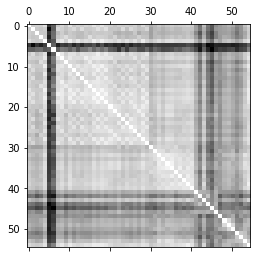

In [ ]:
plt.matshow(df.corr(),cmap='gray')
plt.show()

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


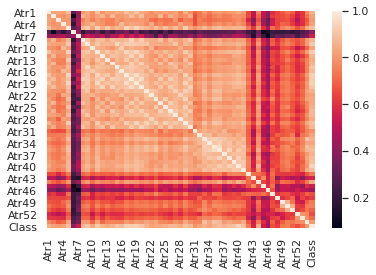

In [ ]:
import seaborn as sns; 
sns.set()
ax = sns.heatmap(df.corr())

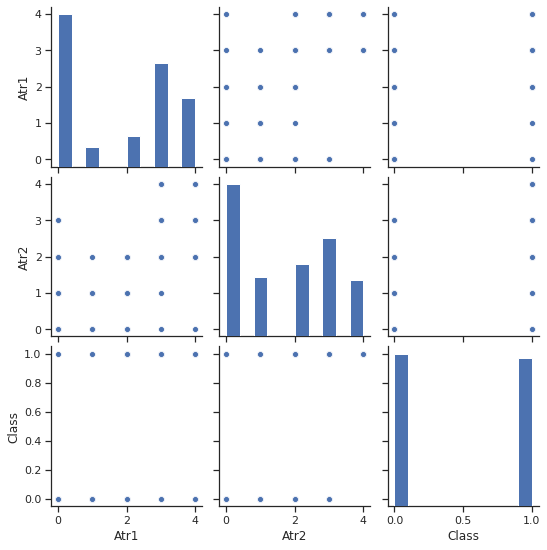

In [ ]:
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)
#g = sns.pairplot(df)
g = sns.pairplot(df, vars=["Atr1","Atr2","Class"])

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
X.shape

(170, 54)

In [ ]:
y.shape

(170,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.4, random_state=10)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(102, 54) (102,) (68, 54) (68,)


# Decision tree

In [ ]:
dct = DecisionTreeClassifier(random_state=0,max_depth=4)
%time dct.fit(X_train,y_train)
print("Training Acc: ",accuracy_score(y_train,dct.predict(X_train)))
print("Testing Acc: ",accuracy_score(y_test, dct.predict(X_test)))

CPU times: user 2.73 ms, sys: 0 ns, total: 2.73 ms
Wall time: 4.87 ms
Training Acc:  1.0
Testing Acc:  0.9852941176470589


# Perceptron

In [ ]:
percept = Perceptron(random_state=0)
%time percept.fit(X_train,y_train)
print("Training Acc: ",accuracy_score(y_train,dct.predict(X_train)))
print("Testing Acc: ",accuracy_score(y_test, dct.predict(X_test)))

CPU times: user 2.3 ms, sys: 0 ns, total: 2.3 ms
Wall time: 2.17 ms
Training Acc:  1.0
Testing Acc:  0.9852941176470589


# Logistic Regression

In [ ]:
%%time
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
print("Training Acc: ",lr.score(X_train,y_train))
print("Testing Acc: ",accuracy_score(y_test, lr.predict(X_test)))

Training Acc:  1.0
Testing Acc:  1.0
CPU times: user 10.4 ms, sys: 2.04 ms, total: 12.4 ms
Wall time: 18 ms


# Split 70-30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.98, random_state=10)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(3, 54) (3,) (167, 54) (167,)


Decision Tree

In [ ]:
dct = DecisionTreeClassifier(random_state=0,max_depth=4)
%time dct.fit(X_train,y_train)
print("Training Acc: ",accuracy_score(y_train,dct.predict(X_train)))
print("Testing Acc: ",accuracy_score(y_test, dct.predict(X_test)))

CPU times: user 834 µs, sys: 989 µs, total: 1.82 ms
Wall time: 1.6 ms
Training Acc:  1.0
Testing Acc:  0.7365269461077845


Perceptron

In [ ]:
percept = Perceptron(random_state=0)
%time percept.fit(X_train,y_train)
print("Training Acc: ",percept.score(X_train,y_train))
print("Testing Acc: ",percept.score(X_test,y_test))

CPU times: user 1.84 ms, sys: 0 ns, total: 1.84 ms
Wall time: 1.6 ms
Training Acc:  1.0
Testing Acc:  0.5089820359281437


Logisitic Regression

In [ ]:
%%time
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
print("Training Acc: ",lr.score(X_train,y_train))
print("Testing Acc: ",accuracy_score(y_test, lr.predict(X_test)))

Training Acc:  1.0
Testing Acc:  0.9401197604790419
CPU times: user 11 ms, sys: 1.25 ms, total: 12.3 ms
Wall time: 11.4 ms


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv=5)
print(scores)

[0.88235294 1.         1.         1.         1.        ]


In [ ]:
X.shape

(170, 54)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(percept, X, y, cv=5)
print(scores)

[0.88235294 1.         1.         1.         0.97058824]


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dct, X, y, cv=5)
print(scores)

[0.91176471 1.         1.         0.97058824 0.94117647]


# Learning Curves

# Model Parameters

In [ ]:
percept.coef_

array([[ 1.,  1.,  1.,  1.,  1.,  2.,  0.,  2.,  2.,  2.,  3.,  0.,  0.,
         2.,  1.,  0.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  0.,  0., -1.,  0., -1.,  0.,  0.,  0.,  0.,
         1., -1.,  0., -1.,  0., -2.,  2.,  0.,  2.,  1.,  1.,  0.,  3.,
         3.,  1.]])

In [ ]:
percept.intercept_

array([0.])

In [ ]:
percept.t_

22.0

In [ ]:
percept.n_iter_

7

In [ ]:
lr.coef_

array([[ 0.06667079,  0.06667079,  0.06525414,  0.0638375 ,  0.06667079,
         0.12200841,  0.        ,  0.127675  ,  0.12625835,  0.1248417 ,
         0.1886792 ,  0.00566659,  0.00566659,  0.127675  ,  0.06525414,
         0.00283329,  0.06667079,  0.127675  ,  0.06667079,  0.00566659,
         0.00424994,  0.00283329,  0.00566659,  0.06667079,  0.06667079,
         0.06667079,  0.06525414,  0.0638375 ,  0.06667079,  0.06667079,
         0.00424854,  0.00424854, -0.05675566,  0.00424854, -0.05675566,
         0.00566659,  0.00424854,  0.00424854,  0.0028305 ,  0.06525275,
        -0.0581737 ,  0.0028305 , -0.06100979,  0.0028305 , -0.12201399,
         0.127675  ,  0.00566659,  0.127675  ,  0.06525275,  0.06525275,
         0.0028305 ,  0.18726116,  0.1886792 ,  0.06383471]])

In [ ]:
lr.intercept_

array([-2.30207364])

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.coef_

array([[ 0.02325581,  0.02325581,  0.02325581,  0.02325581,  0.02325581,
         0.04651163,  0.        ,  0.04651163,  0.04651163,  0.04651163,
         0.06976744,  0.        ,  0.        ,  0.04651163,  0.02325581,
         0.        ,  0.02325581,  0.04651163,  0.02325581,  0.        ,
         0.        ,  0.        ,  0.        ,  0.02325581,  0.02325581,
         0.02325581,  0.02325581,  0.02325581,  0.02325581,  0.02325581,
         0.        ,  0.        , -0.02325581,  0.        , -0.02325581,
         0.        ,  0.        ,  0.        ,  0.        ,  0.02325581,
        -0.02325581,  0.        , -0.02325581,  0.        , -0.04651163,
         0.04651163,  0.        ,  0.04651163,  0.02325581,  0.02325581,
         0.        ,  0.06976744,  0.06976744,  0.02325581]])

In [ ]:
clf.support_vectors_

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 0., 1., 1., 2., 1., 2., 2., 4., 2., 4., 0., 0., 0.,
        1., 1., 2., 1., 0., 2.],
       [1., 1., 1., 1., 1., 2., 0., 2., 2., 2., 3., 0., 0., 2., 1., 0.,
        1., 2., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 0., 0., 1., 1., 2., 2., 1., 2., 3., 2., 2., 2., 0., 2.,
        2., 2., 2., 4., 3., 3.]])

In [ ]:
clf.dual_coef_

array([[-0.02325581,  0.02325581]])

In [ ]:
clf.intercept_

array([-0.81395349])